In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

C:\Users\Fenil\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn
import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
import keras
from keras.models import save_model
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score
import keras
from keras.models import save_model
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, Callback
from tqdm import tqdm

In [5]:
df1 = pd.read_csv('merged_health_care.csv',low_memory=False)

In [6]:
df = df1.sample(frac=1.0, random_state=42)

In [7]:
df = df.sample(frac=1.0, random_state=42)

In [8]:
df.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
118455,0.000093,1439.960241,70,10.5.126.56,10.5.126.143,1883,34237,0x00000018,0.000093,2,...,0.0,0.0,0,0.0,0.0,0.0,6,64,patientMonitoring,0
115502,0.000154,786.961009,78,10.5.126.145,10.5.126.56,38937,1883,0x00000018,1.999850,10,...,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
125309,0.000092,2939.961989,70,10.5.126.56,10.5.126.142,1883,43335,0x00000018,0.000092,2,...,0.0,0.0,0,0.0,0.0,0.0,6,64,patientMonitoring,0
3324,0.000009,0.283893,66,10.16.120.44,10.16.120.72,57510,1883,0x00000010,0.000191,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
186630,0.995073,6384.036787,80,10.5.126.146,10.5.126.56,42305,1883,0x00000018,1.998781,12,...,0.0,0.0,AirFlow,7.0,0.0,0.0,6,64,patientMonitoring,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188694 entries, 118455 to 118503
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       188694 non-null  float64
 1   frame.time_relative    188694 non-null  float64
 2   frame.len              188694 non-null  int64  
 3   ip.src                 188694 non-null  object 
 4   ip.dst                 188694 non-null  object 
 5   tcp.srcport            188694 non-null  int64  
 6   tcp.dstport            188694 non-null  int64  
 7   tcp.flags              188694 non-null  object 
 8   tcp.time_delta         188694 non-null  float64
 9   tcp.len                188694 non-null  int64  
 10  tcp.ack                188694 non-null  int64  
 11  tcp.connection.fin     188694 non-null  float64
 12  tcp.connection.rst     188694 non-null  float64
 13  tcp.connection.sack    188694 non-null  float64
 14  tcp.connection.syn     188694 n

In [10]:
df.head(5)

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
118455,0.000093,1439.960241,70,10.5.126.56,10.5.126.143,1883,34237,0x00000018,0.000093,2,...,0.0,0.0,0,0.0,0.0,0.0,6,64,patientMonitoring,0
115502,0.000154,786.961009,78,10.5.126.145,10.5.126.56,38937,1883,0x00000018,1.999850,10,...,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
125309,0.000092,2939.961989,70,10.5.126.56,10.5.126.142,1883,43335,0x00000018,0.000092,2,...,0.0,0.0,0,0.0,0.0,0.0,6,64,patientMonitoring,0
3324,0.000009,0.283893,66,10.16.120.44,10.16.120.72,57510,1883,0x00000010,0.000191,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
186630,0.995073,6384.036787,80,10.5.126.146,10.5.126.56,42305,1883,0x00000018,1.998781,12,...,0.0,0.0,AirFlow,7.0,0.0,0.0,6,64,patientMonitoring,0


In [11]:
valid_topics = ['0', 'EMG', 'ECG', 'Pulsoximeter', 'AirFlow', '0.0', 'CoGas', 'Smoke',
                'Fire', 'Temperature', 'Barometer', 'Humidity', 'SolarRad', 'Topic1',
                'InfusionPump', 'BloodPressure', 'Glucometer']

df['mqtt.topic'] = df['mqtt.topic'].apply(lambda x: x if x in valid_topics else 'Environmental')

In [12]:
df['mqtt.topic'].value_counts()

0                63591
Environmental    25124
ECG              16886
EMG              16886
Pulsoximeter     16884
AirFlow          16882
0.0               9202
Fire              3946
CoGas             3946
Smoke             3946
Temperature       2490
Barometer         2368
Humidity          2368
SolarRad          2368
Topic1            1441
Glucometer         122
BloodPressure      122
InfusionPump       122
Name: mqtt.topic, dtype: int64

In [13]:
valid_topics = ['Environmental','EMG', 'ECG', 'Pulsoximeter', 'AirFlow', '0.0', 'CoGas', 'Smoke',
                'Fire', 'Temperature', 'Barometer', 'Humidity', 'SolarRad', 'Topic1',
                'InfusionPump', 'BloodPressure', 'Glucometer']

df['mqtt.topic'] = df['mqtt.topic'].apply(lambda x: x if x in valid_topics else 'Wearable')

In [14]:
valid_topics = ['Environmental','EMG', 'ECG', 'Pulsoximeter', 'AirFlow', 'Wearable', 'CoGas', 'Smoke',
                'Fire', 'Temperature', 'Barometer', 'Humidity', 'SolarRad', 'Topic1',
                'InfusionPump', 'BloodPressure', 'Glucometer']

df['mqtt.topic'] = df['mqtt.topic'].apply(lambda x: x if x in valid_topics else 'Scale')

In [15]:
valid_topics = ['Environmental','EMG', 'ECG', 'Pulsoximeter', 'AirFlow', 'Wearable', 'CoGas', 'Smoke',
                'Fire', 'Temperature', 'Barometer', 'Humidity', 'SolarRad', 'Scale',
                'InfusionPump', 'BloodPressure', 'Glucometer']

df['mqtt.topic'] = df['mqtt.topic'].apply(lambda x: x if x in valid_topics else 'Weather')

In [16]:
df['mqtt.topic'].value_counts()

Wearable         63591
Environmental    25124
ECG              16886
EMG              16886
Pulsoximeter     16884
AirFlow          16882
Scale             9202
Fire              3946
CoGas             3946
Smoke             3946
Temperature       2490
Barometer         2368
Humidity          2368
SolarRad          2368
Weather           1441
Glucometer         122
BloodPressure      122
InfusionPump       122
Name: mqtt.topic, dtype: int64

In [17]:
df['label'].value_counts()

0    108568
1     80126
Name: label, dtype: int64

In [18]:
df.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
118455,0.000093,1439.960241,70,10.5.126.56,10.5.126.143,1883,34237,0x00000018,0.000093,2,...,0.0,0.0,Wearable,0.0,0.0,0.0,6,64,patientMonitoring,0
115502,0.000154,786.961009,78,10.5.126.145,10.5.126.56,38937,1883,0x00000018,1.999850,10,...,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
125309,0.000092,2939.961989,70,10.5.126.56,10.5.126.142,1883,43335,0x00000018,0.000092,2,...,0.0,0.0,Wearable,0.0,0.0,0.0,6,64,patientMonitoring,0
3324,0.000009,0.283893,66,10.16.120.44,10.16.120.72,57510,1883,0x00000010,0.000191,0,...,0.0,0.0,Scale,0.0,0.0,0.0,6,64,Attack,1
186630,0.995073,6384.036787,80,10.5.126.146,10.5.126.56,42305,1883,0x00000018,1.998781,12,...,0.0,0.0,AirFlow,7.0,0.0,0.0,6,64,patientMonitoring,0


output funcation : each neuron a sigmoid funcation

group truth : multi-hot encoding 

loss : binary-cross-entropy error funcation [error vector]

In [19]:
X = df[['ip.ttl','mqtt.topic_len','mqtt.msgtype','mqtt.len','tcp.pdu.size','tcp.hdr_len','tcp.flags.push','tcp.ack','tcp.dstport','frame.time_relative','frame.time_delta','tcp.time_delta','frame.len','tcp.flags.ack','tcp.flags.reset','mqtt.qos','mqtt.retain','mqtt.ver','mqtt.kalive','mqtt.dupflag','tcp.flags.syn','tcp.flags.ack']]

In [20]:
y_label = df['label'].apply(lambda x: [int(i) for i in str(x)])
y_mqtt_topic = df['mqtt.topic'].apply(lambda x: [str(i) for i in x.split(',')])

In [21]:
y_mqtt_topic, y_label 

(118455      [Wearable]
 115502           [ECG]
 125309      [Wearable]
 3324           [Scale]
 186630       [AirFlow]
               ...     
 131457    [Glucometer]
 180306           [EMG]
 147456           [ECG]
 72957       [Wearable]
 118503           [EMG]
 Name: mqtt.topic, Length: 188694, dtype: object,
 118455    [0]
 115502    [0]
 125309    [0]
 3324      [1]
 186630    [0]
          ... 
 131457    [0]
 180306    [0]
 147456    [0]
 72957     [1]
 118503    [0]
 Name: label, Length: 188694, dtype: object)

In [22]:
# Data Preprocessing: Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled[0]

array([-0.38821837, -0.55014709,  3.63361505, -0.49934334, -0.4913822 ,
        0.70749659,  0.51655377, -0.29390132,  1.06429404,  0.0363731 ,
       -0.19400708, -0.28850497, -0.28811116,  0.13813288, -0.09343325,
       -0.45699947, -0.02522608, -0.10279381, -0.07364043, -0.176202  ,
       -0.14493146,  0.13813288])

In [24]:
mlb_label = MultiLabelBinarizer()
y_label_encoded = mlb_label.fit_transform(y_label)

mlb_mqtt_topic = MultiLabelBinarizer()
y_mqtt_topic_encoded = mlb_mqtt_topic.fit_transform(y_mqtt_topic)

y_encoded = np.hstack((y_label_encoded, y_mqtt_topic_encoded))

In [25]:
y_label_encoded

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [26]:
y_mqtt_topic_encoded

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
y_encoded[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [40]:
X_scaled[0]

array([-0.38821837, -0.55014709,  3.63361505, -0.49934334, -0.4913822 ,
        0.70749659,  0.51655377, -0.29390132,  1.06429404,  0.0363731 ,
       -0.19400708, -0.28850497, -0.28811116,  0.13813288, -0.09343325,
       -0.45699947, -0.02522608, -0.10279381, -0.07364043, -0.176202  ,
       -0.14493146,  0.13813288])

In [41]:
y_encoded[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [35]:
# model = keras.Sequential([
#     keras.layers.Input(shape=(X_train.shape[1],)),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(len(mlb_label.classes_) + len(mlb_mqtt_topic.classes_), activation='sigmoid')
# ])

# using RMP prop only

In [50]:
# Build the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5), 
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(len(mlb_label.classes_) + len(mlb_mqtt_topic.classes_), activation='sigmoid')
])

In [51]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
import keras
from keras.callbacks import Callback

class ReduceLRonDrop(Callback):
    def __init__(self, factor=0.2, threshold=0.05, patience=3):
        super(ReduceLRonDrop, self).__init__()
        self.factor = factor
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        if epoch > 0:
            acc_diff = logs['val_accuracy'] - self.prev_accuracy
            if acc_diff < -self.threshold:
                lr = float(keras.backend.get_value(self.model.optimizer.lr))
                new_lr = lr * self.factor
                keras.backend.set_value(self.model.optimizer.lr, new_lr)
                print(f'Reducing learning rate to {new_lr:.6f} due to accuracy drop.')
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.wait = 0
                    lr = float(keras.backend.get_value(self.model.optimizer.lr))
                    new_lr = lr * self.factor
                    keras.backend.set_value(self.model.optimizer.lr, new_lr)
                    print(f'Reducing learning rate to {new_lr:.6f} due to patience.')
        
        self.prev_accuracy = logs['val_accuracy']

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr_on_drop = ReduceLRonDrop(factor=0.2, threshold=0.05, patience=3)

In [54]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.2259 - accuracy: 0.9093 - val_loss: 0.1142 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 2/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.1148 - accuracy: 0.9955 - val_loss: 0.1066 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 3/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.1104 - accuracy: 0.9949 - val_loss: 0.1028 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 4/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.1078 - accuracy: 0.9943 - val_loss: 0.1010 - val_accuracy: 0.9998 - lr: 0.0010
Epoch 5/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.1061 - accuracy: 0.9931 - val_loss: 0.0979 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 6/15
1887/1887 [==============================] - 16s 8ms/step - loss: 0.1049 - accuracy: 0.9926 - val_loss: 0.0971 - val_accuracy: 0.9998 - lr: 0.0010
Epoch 7/15
1887/1887 [==============================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test)

In [ ]:
y_label_encoded

In [ ]:
y_test[0],predictions[0]

# using 4 optimizers

In [29]:
optimizers = ['RMSprop', 'Adam', 'Adagrad', 'SGD']

In [30]:
results = []

In [31]:
import keras
from keras.callbacks import Callback

class ReduceLRonDrop(Callback):
    def __init__(self, factor=0.2, threshold=0.05, patience=3):
        super(ReduceLRonDrop, self).__init__()
        self.factor = factor
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        if epoch > 0:
            acc_diff = logs['val_accuracy'] - self.prev_accuracy
            if acc_diff < -self.threshold:
                lr = float(keras.backend.get_value(self.model.optimizer.lr))
                new_lr = lr * self.factor
                keras.backend.set_value(self.model.optimizer.lr, new_lr)
                print(f'\nReducing learning rate to {new_lr:.6f} due to accuracy drop.')
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.wait = 0
                    lr = float(keras.backend.get_value(self.model.optimizer.lr))
                    new_lr = lr * self.factor
                    keras.backend.set_value(self.model.optimizer.lr, new_lr)
                    print(f'\nReducing learning rate to {new_lr:.6f} due to patience.')
        
        self.prev_accuracy = logs['val_accuracy']

In [32]:
# Custom callback for real-time updates
class RealTimeCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']} - "
              f"Loss: {logs['loss']:.4f} - "
              f"Accuracy: {logs['accuracy']:.4f} - "
              f"Validation Loss: {logs['val_loss']:.4f} - "
              f"Validation Accuracy: {logs['val_accuracy']:.4f}", end='')

In [35]:
for optimizer in optimizers:
    print(f"Training with optimizer: {optimizer}")
    
    model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5), 
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(len(mlb_label.classes_) + len(mlb_mqtt_topic.classes_), activation='sigmoid')
    ])
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    reduce_lr_on_drop = ReduceLRonDrop(factor=0.2, threshold=0.05, patience=3)
    real_time_callback = RealTimeCallback()
    
    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr_on_drop,real_time_callback])
    
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    
    predictions = model.predict(X_test)
    y_pred = np.round(predictions)
    
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    
    model_filename = f"model_{optimizer}.keras"
    save_model(model, model_filename)
    
    
    
    result = {
        'optimizer': optimizer,
        'history': history.history,
        'test_loss': loss,
        'test_accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision,
        'model_filename': model_filename
    }
    results.append(result)

Training with optimizer: RMSprop
Epoch 1/15
1887/1887 [==============================] - 17s 9ms/step - loss: 0.2128 - accuracy: 0.8973 - val_loss: 0.0965 - val_accuracy: 0.9517
Epoch 2/15
1883/1887 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9096Reducing learning rate to 0.000200 due to accuracy drop.

1887/1887 [==============================] - 16s 9ms/step - loss: 0.0945 - accuracy: 0.9096 - val_loss: 0.0925 - val_accuracy: 0.9004
Epoch 3/15
1887/1887 [==============================] - 17s 9ms/step - loss: 0.0829 - accuracy: 0.9228 - val_loss: 0.0777 - val_accuracy: 0.9733
Epoch 4/15
1887/1887 [==============================] - 16s 9ms/step - loss: 0.0813 - accuracy: 0.9254 - val_loss: 0.0765 - val_accuracy: 0.9696
Epoch 5/15
1885/1887 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9223Reducing learning rate to 0.000040 due to patience.

1887/1887 [==============================] - 18s 10ms/step - loss: 0.0803 - accuracy: 0.9222 

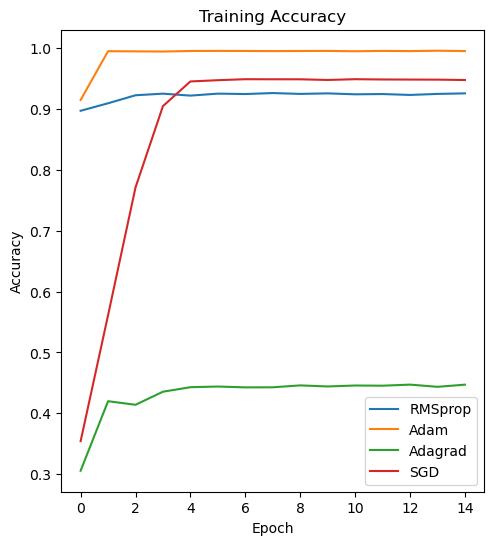

In [36]:
# Plotting
plt.figure(figsize=(12, 6))
# Plotting accuracy
plt.subplot(1, 2, 1)
for result in results:
    plt.plot(result['history']['accuracy'], label=result['optimizer'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

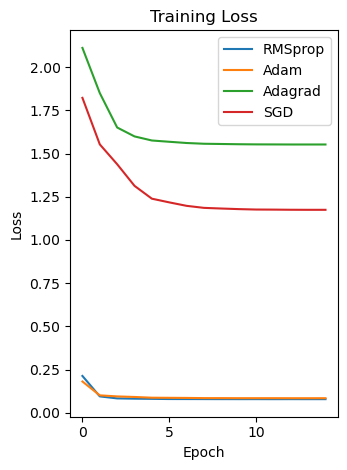

In [37]:
# Plotting loss
plt.subplot(1, 2, 2)
for result in results:
    plt.plot(result['history']['loss'], label=result['optimizer'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


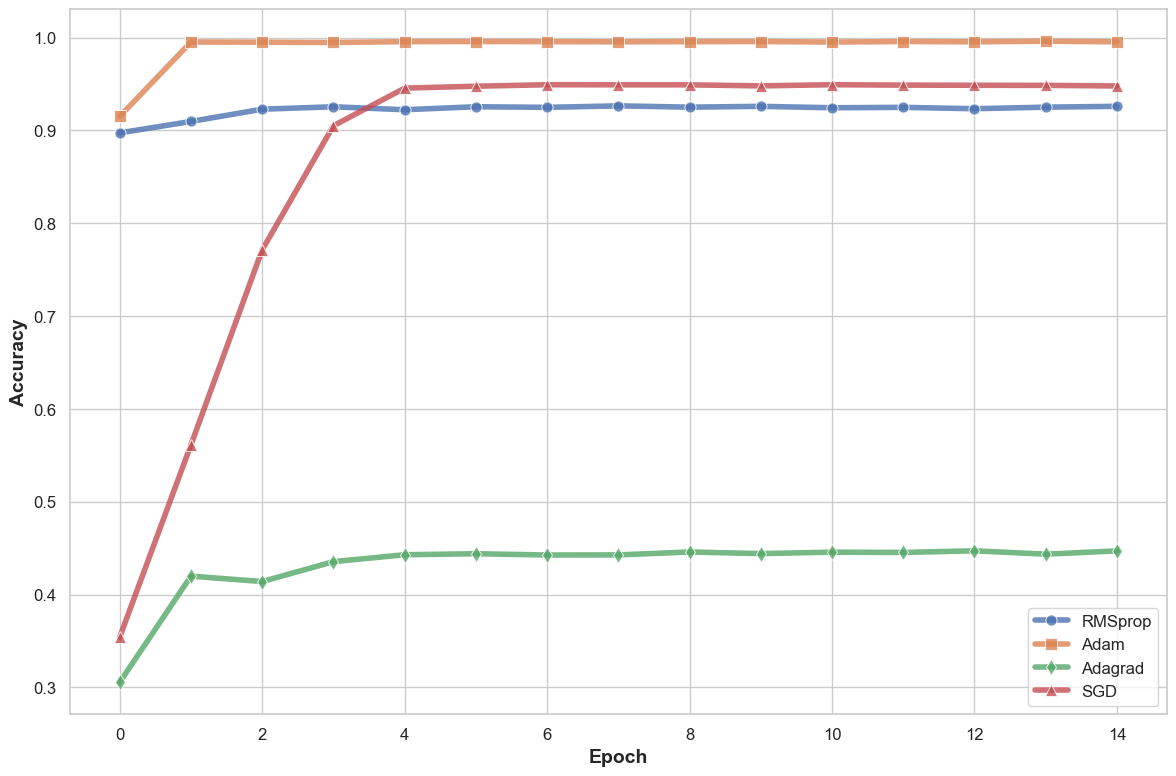

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Define a list of marker styles
marker_styles = ['o', 's', 'd', '^', 'v', '<', '>', 'p', 'h']

# Loop through results and plot lines with different markers
for i, result in enumerate(results):
    sns.lineplot(x=range(len(result['history']['accuracy'])), y=result['history']['accuracy'], label=result['optimizer'], alpha=0.8, linewidth=4, marker=marker_styles[i % len(marker_styles)], markersize=8)  # Increased markersize value

# Set plot title (uncomment if needed)
# plt.title('Training Accuracy', fontsize=16, fontweight='bold')

# Set x and y labels
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize legend
plt.legend(fontsize=12)

# Adjust layout and spacing
plt.tight_layout()

# Save the plot as a PNG file with higher resolution and tight bounds
plt.savefig('accuracy_plot_markers_ieee.png', dpi=600, bbox_inches='tight')

plt.show()


In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

for result in results:
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    plot_confusion_matrix(y_test, y_pred_binary, classes=['Non-Manipulated', 'Manipulated'])


1180/1180 [==============================] - 3s 2ms/step


ValueError: multilabel-indicator is not supported

1180/1180 [==============================] - 3s 2ms/step


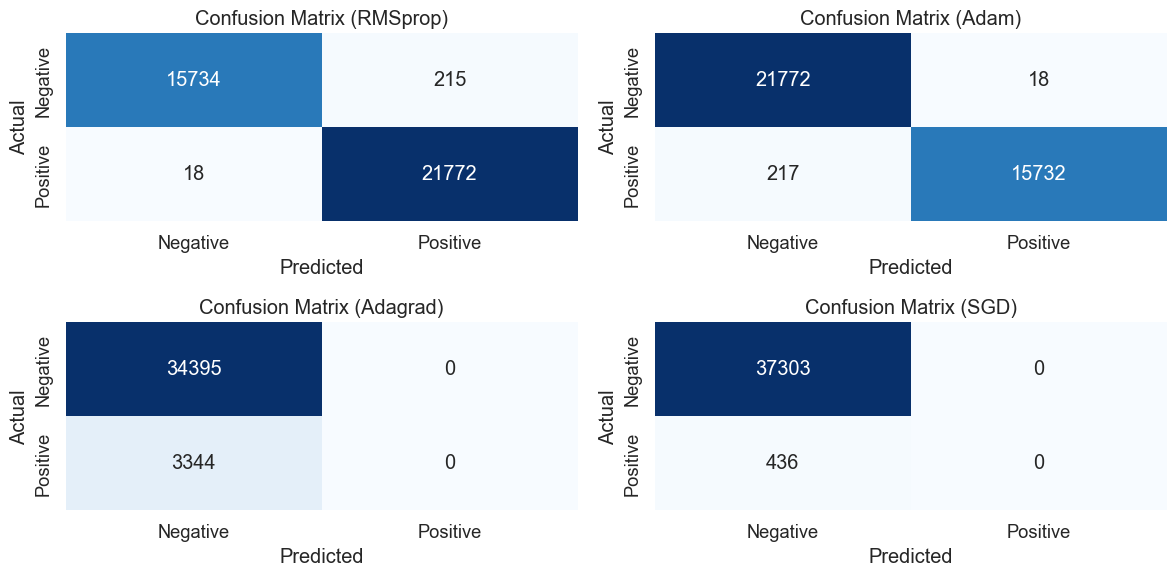

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load your Adam optimized model
# model = ...

# Assuming X_test and y_test are your test data
# X_test = ...
# y_test = ...

# Get predictions from the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Names of your target labels
target_labels = ['mqtt.topic', 'label']

# Plot confusion matrices
plt.figure(figsize=(12, 6))
for i, result in enumerate(results):
    plt.subplot(2, 2, i+1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix ({result["optimizer"]})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Adjust layout and display
plt.tight_layout()
plt.show()

1180/1180 [==============================] - 2s 2ms/step


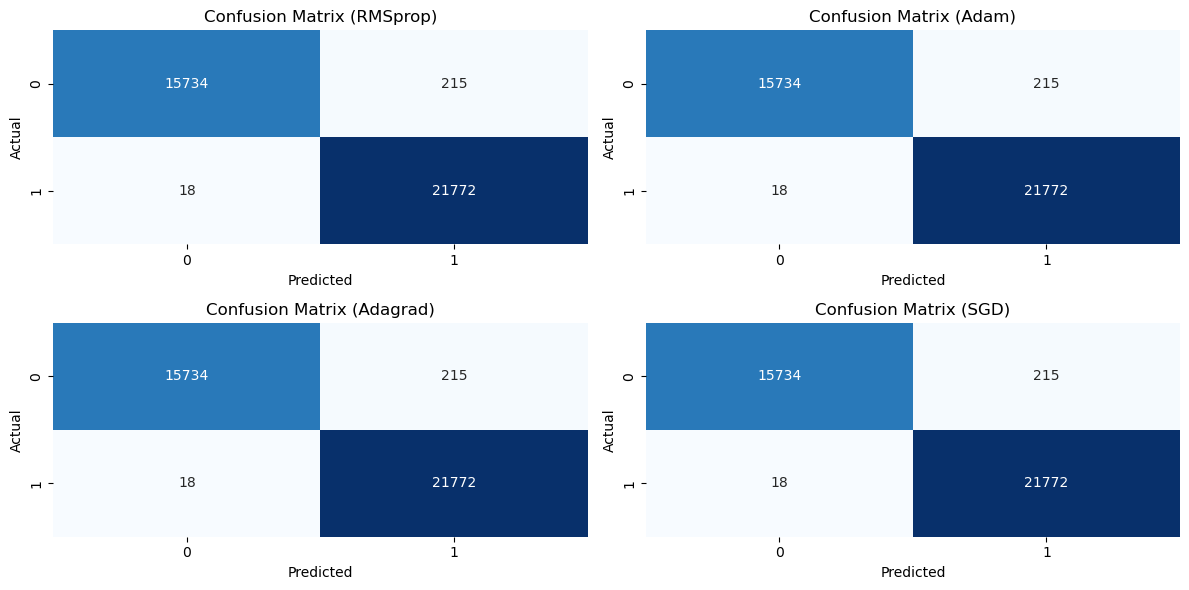

In [38]:
# Confusion matrix
plt.figure(figsize=(12, 6))
for i, result in enumerate(results):
    predictions = model.predict(X_test)
    y_pred = np.round(predictions)
    confusion_mtx = multilabel_confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i+1)
    sns.heatmap(confusion_mtx[0], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix ({result["optimizer"]})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [84]:
results

[{'optimizer': 'RMSprop',
  'history': {'loss': [0.21276956796646118,
    0.09449124336242676,
    0.08291415125131607,
    0.0812673345208168,
    0.08027151226997375,
    0.07921306788921356,
    0.07910382002592087,
    0.07887987792491913,
    0.07869558781385422,
    0.07860175520181656,
    0.07865448296070099,
    0.07850327342748642,
    0.07862723618745804,
    0.07848493754863739,
    0.07856263220310211],
   'accuracy': [0.8973121047019958,
    0.9096171259880066,
    0.9228081107139587,
    0.9254330992698669,
    0.9222367405891418,
    0.9254578948020935,
    0.9248120188713074,
    0.9264184832572937,
    0.9250190258026123,
    0.9258967638015747,
    0.9243731498718262,
    0.9247954487800598,
    0.9233380556106567,
    0.9250024557113647,
    0.9259133338928223],
   'val_loss': [0.09651531279087067,
    0.09253636747598648,
    0.0776875913143158,
    0.07651878148317337,
    0.07592969387769699,
    0.07538384199142456,
    0.0752689391374588,
    0.0750237405300140

In [86]:
import pickle

# Save the dictionary to a file using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Problem Transformation

## Binary Relevance

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = BinaryRelevance(GaussianNB())

In [ ]:
# train
classifier.fit(X_train, y_train)

In [ ]:
# predict
predictions = classifier.predict(X_test)

In [ ]:
predictions[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

## Classifier Chains

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

In [ ]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

In [ ]:
# train
classifier.fit(X_train, y_train)

In [ ]:
# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

## label powerset

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
y_label = df['label'].apply(lambda x: [int(i) for i in str(x)])
y_mqtt_topic = df['mqtt.topic'].apply(lambda x: [str(i) for i in x.split(',')])

mlb_label = MultiLabelBinarizer()
y_label_encoded = mlb_label.fit_transform(y_label)

mlb_mqtt_topic = MultiLabelBinarizer()
y_mqtt_topic_encoded = mlb_mqtt_topic.fit_transform(y_mqtt_topic)

y_encoded = np.hstack((y_label_encoded, y_mqtt_topic_encoded))

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class DeeperMultiLabelModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeeperMultiLabelModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

In [ ]:
# Lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
# Initialize the more complex model
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
complex_model = ComplexMultiLabelClassifier(input_dim, output_dim)

In [ ]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(complex_model.parameters(), lr=0.001)

In [ ]:
from sklearn.metrics import accuracy_score

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        all_predictions = []
        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item()
            predicted_labels = (outputs > 0.5).float()  # Apply threshold
            all_predictions.append(predicted_labels)

        avg_test_loss = test_loss / len(test_loader)
        all_predictions = torch.cat(all_predictions)
        accuracy = accuracy_score(y_test_tensor, all_predictions)

        print(f'Epoch [{epoch+1}/{num_epochs}], Avg. Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.4f}')


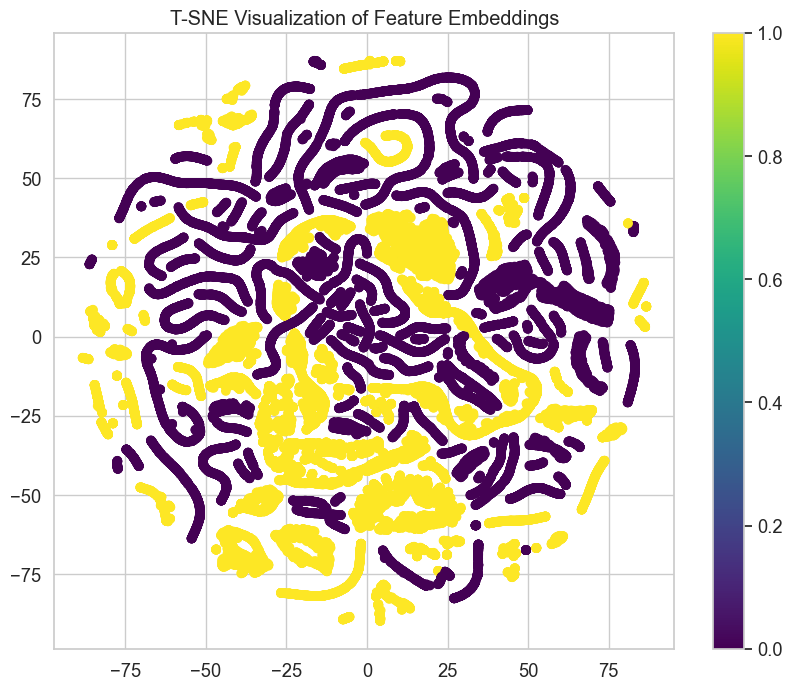

In [90]:
embeddings = TSNE(n_components=2).fit_transform(X_test)
plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_test.argmax(axis=1), cmap='viridis')
plt.colorbar()
plt.title('T-SNE Visualization of Feature Embeddings')
plt.show()

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
# ... [your existing imports] ...

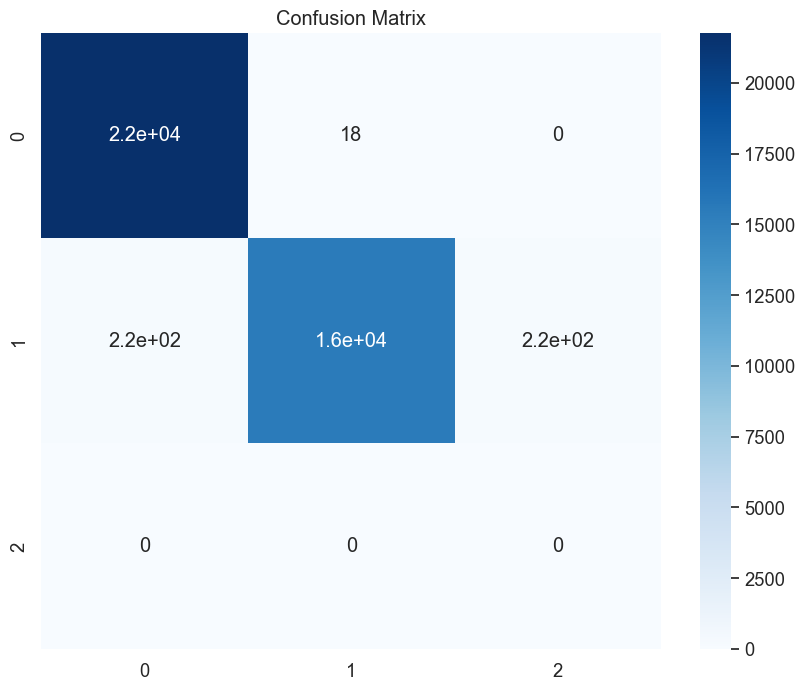

In [91]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [99]:
from PIL import Image

def increase_dpi(image_path, target_dpi):
    image = Image.open(image_path)

    # Calculate the new size to achieve the desired DPI
    width, height = image.size
    dpi_x, dpi_y = image.info.get('dpi', (72, 72))  # Default DPI is set to 72 if not available
    new_width = int(width * target_dpi / dpi_x)
    new_height = int(height * target_dpi / dpi_y)

    # Resize the image
    new_image = image.resize((new_width, new_height), Image.LANCZOS)

    # Save the new image with the desired DPI
    new_image.save("high_dpi_PUBmed_image.png", dpi=(target_dpi, target_dpi))

# Specify the path to your input image and the desired DPI
input_image_path = "unnamed.jpg"
desired_dpi = 600

increase_dpi(input_image_path, desired_dpi)

1180/1180 [==============================] - 3s 2ms/step


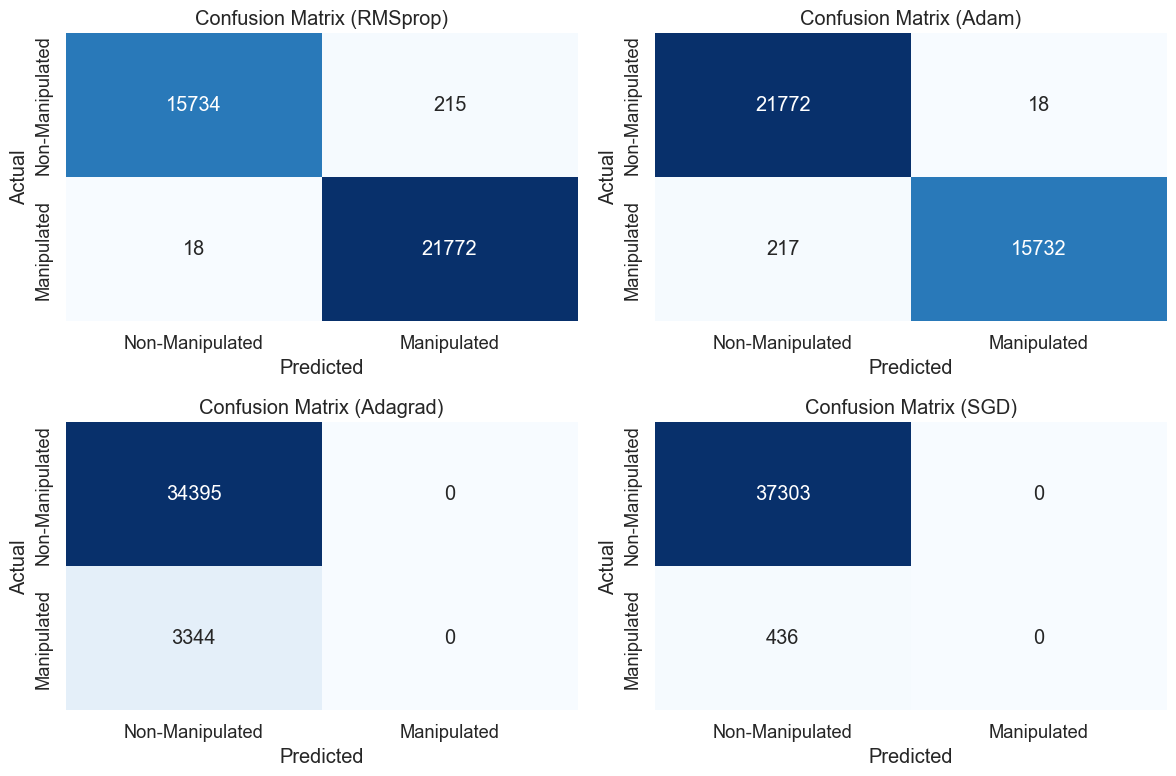

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load your Adam optimized model
# model = ...

# Assuming X_test and y_test are your test data
# X_test = ...
# y_test = ...

# Get predictions from the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Names of your target labels
target_labels = ['mqtt.topic', 'label']

# Plot confusion matrices
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    plt.subplot(2, 2, i+1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix ({result["optimizer"]})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['Non-Manipulated', 'Manipulated'])
    plt.yticks([0.5, 1.5], ['Non-Manipulated', 'Manipulated'])

# Adjust layout and display
plt.tight_layout()
plt.savefig('confusion_label.png', dpi=600, bbox_inches='tight')
plt.show()